In [1]:
from sklearn.metrics import ndcg_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
def round_up(entry):
    
    rounded_up = [round(num, 2) for num in entry]
    
    return rounded_up        

In [13]:
import math

def ndcg(truth, score, at):
    
    if not len(score) == len(truth):
        return "Error, the size of 'truth' and 'score' must be the same"
    
    g = score
    g_i = truth
    
#     print('g: {}'.format(g))
#     print('g_i: {}'.format(g_i))
#     print()
    
    
#  Swap 'score' and 'truth' from places if score > truth, this way does not bug the calculation
    aux_g = g.copy()
    aux_g_i = g_i.copy()

    for idx in range(0, len(g)): 
        if g[idx] > g_i[idx]:
            aux_g_i[idx] = g[idx]
            aux_g[idx] = g_i[idx]
            
    g = aux_g
    g_i = aux_g_i
    
#     print('corrected g: {}'.format(g))
#     print('correctedg_i: {}'.format(g_i))
#     print()

    cg = []
    cg_i = []
    
# # Calculates CG and CGi
    for idx in range(0, len(g)): 
        if idx == 0:
            cg.insert(idx, g[idx])
            cg_i.insert(idx, g_i[idx])
        else:
            cg.insert(idx, cg[idx-1] + g[idx])
            cg_i.insert(idx, cg_i[idx-1] + g_i[idx])
    
            
#     print('cg: {}'.format(cg))
#     print('cg_i: {}'.format(cg_i))
#     print()
    
    dcg = []
    dcg_i = []
    
# # Calculates DCG and DCGi
    for idx in range(0, len(g)): 
        if idx == 0 :
            dcg.insert(idx, round(cg[idx], 2))
            dcg_i.insert(idx, round(cg_i[idx], 2))
        else:
            dcg.insert(idx, dcg[idx-1] + round((g[idx] / math.log2(idx+1)), 2) )
            dcg_i.insert(idx, dcg_i[idx-1] + round((g_i[idx] / math.log2(idx+1)), 2) )
            
#     print('dcg: {}'.format(dcg))
#     print('dcg_i: {}'.format(dcg_i))
#     print()
    
# # Calculates nDCG@  = DCG@ / DCGi@
#     print('TESTE at={}, at-1={}, dcg[at-1]={}, dcg_i[at-1]={}'.format(at, at-1, dcg[at-1], dcg_i[at-1]))
    ndcg_value = round(dcg[at-1] / dcg_i[at-1], 2)
    
#     print('ndcg@{} = {}'.format(at, ndcg_value))
   
    return ndcg_value

In [5]:
# ndcg([0.8,0.5,0.4], [0.6,0.4,0.3], 3)

In [6]:
ndcg([0.4, 1, 0.4, 0.4, 0.2, 1, 0.6, 0.4, 0.5, 0.6], [0.799,0.71,0.721,0.702,0.684,0.703,0.763,0.738,0.651,0.678], 10)

g: [0.799, 0.71, 0.721, 0.702, 0.684, 0.703, 0.763, 0.738, 0.651, 0.678]
g_i: [0.4, 1, 0.4, 0.4, 0.2, 1, 0.6, 0.4, 0.5, 0.6]

corrected g: [0.4, 0.71, 0.4, 0.4, 0.2, 0.703, 0.6, 0.4, 0.5, 0.6]
correctedg_i: [0.799, 1, 0.721, 0.702, 0.684, 1, 0.763, 0.738, 0.651, 0.678]

cg: [0.4, 1.1099999999999999, 1.5099999999999998, 1.9099999999999997, 2.11, 2.8129999999999997, 3.413, 3.8129999999999997, 4.313, 4.912999999999999]
cg_i: [0.799, 1.799, 2.52, 3.222, 3.906, 4.906000000000001, 5.6690000000000005, 6.407, 7.058, 7.736]

dcg: [0.4, 1.1099999999999999, 1.3599999999999999, 1.5599999999999998, 1.65, 1.92, 2.13, 2.26, 2.42, 2.6]
dcg_i: [0.8, 1.8, 2.25, 2.6, 2.89, 3.2800000000000002, 3.5500000000000003, 3.8000000000000003, 4.010000000000001, 4.210000000000001]

TESTE at=10, at-1=9, dcg[at-1]=2.6, dcg_i[at-1]=4.210000000000001


0.62

In [7]:
def set_ground_truth_lists():
    
    groups_ground_truth = []
    
#     g31_ground_truth = round_up([2,5,2,2,1,5,3,2,2.5,3])
#     g32_ground_truth = round_up([2,3,3.5,2.5,4,2.5,4.5,1.5,4.5,4.5])
#     g33_ground_truth = round_up([4.5, 4, 3.5, 3.5, 4, 2.5, 4, 4, 2.5, 3.5])
#     g51_ground_truth = round_up([3.5, 2, 2.5, 2, 4.5, 4, 1, 4, 4, 1.5])
#     g52_ground_truth = round_up([2.5, 4, 2.5, 2.7, 3, 4, 2, 2, 3.7, 3])
#     g53_ground_truth = round_up([3, 5, 3, 4, 2, 4, 3.5, 3.5, 3, 3])
    
    g31_ground_truth = round_up([0.4, 1, 0.4, 0.4, 0.2, 1, 0.6, 0.4, 0.5, 0.6])
    g32_ground_truth = round_up([0.4, 0.6, 0.7, 0.5, 0.8, 0.5, 0.9, 0.3, 0.9, 0.9])
    g33_ground_truth = round_up([0.9, 0.8, 0.7, 0.7, 0.8, 0.5, 0.8, 0.8, 0.5, 0.7])
    g51_ground_truth = round_up([0.7, 0.4, 0.5, 0.4, 0.9, 0.8, 0.2, 0.8, 0.8, 0.3])
    g52_ground_truth = round_up([0.5, 0.8, 0.5, 0.54, 0.6, 0.8, 0.4, 0.4, 0.74, 0.6])  
    g53_ground_truth = round_up([0.6, 1, 0.6, 0.8, 0.4, 0.8, 0.7, 0.7, 0.6, 0.6])
    
    groups_ground_truth.append(g31_ground_truth)
    groups_ground_truth.append(g32_ground_truth)
    groups_ground_truth.append(g33_ground_truth)
    groups_ground_truth.append(g51_ground_truth)
    groups_ground_truth.append(g52_ground_truth)
    groups_ground_truth.append(g53_ground_truth)
    
    return groups_ground_truth

In [8]:
groups_ground_truth = set_ground_truth_lists()

for item in groups_ground_truth:
    print(item)

[0.4, 1, 0.4, 0.4, 0.2, 1, 0.6, 0.4, 0.5, 0.6]
[0.4, 0.6, 0.7, 0.5, 0.8, 0.5, 0.9, 0.3, 0.9, 0.9]
[0.9, 0.8, 0.7, 0.7, 0.8, 0.5, 0.8, 0.8, 0.5, 0.7]
[0.7, 0.4, 0.5, 0.4, 0.9, 0.8, 0.2, 0.8, 0.8, 0.3]
[0.5, 0.8, 0.5, 0.54, 0.6, 0.8, 0.4, 0.4, 0.74, 0.6]
[0.6, 1, 0.6, 0.8, 0.4, 0.8, 0.7, 0.7, 0.6, 0.6]


In [9]:
def set_scores_lists():
    
    groups_scores = []
    
#     g31_scores = round_up([3.995,3.55,3.605,3.51,3.42,3.515,3.815,3.69,3.255,3.39])
#     g32_scores = round_up([3.69,3.63,3.26,3.32,3.49,3.05,2.86,2.875,3.41,3.08])
#     g33_scores = round_up([3.59,3.46,3.29,3.305,3.245,3.355,3.17,3.465,3.15,3.215])
#     g51_scores = round_up([4.02,3.345,3.735,3.235,3.42,3.835,3.125,3.53,3.135,3.29])
#     g52_scores = round_up([4.075,3.675,3.41,3.3,3.375,3.36,3.275,3.825,3.245,3.2])
#     g53_scores = round_up([4.18,4.15,3.86,3.715,3.73,3.47,4.045,3.36,3.765,3.86])

    g31_scores = round_up([0.799,0.71,0.721,0.702,0.684,0.703,0.763,0.738,0.651,0.678])
    g32_scores = round_up([0.738,0.726,0.652,0.664,0.698,0.61,0.572,0.575,0.682,0.616])
    g33_scores = round_up([0.718,0.692,0.658,0.661,0.649,0.671,0.634,0.693,0.63,0.643])
    g51_scores = round_up([0.804,0.669,0.747,0.647,0.684,0.767,0.625,0.706,0.627,0.658])
    g52_scores = round_up([0.815,0.735,0.682,0.66,0.675,0.672,0.655,0.765,0.649,0.64])
    g53_scores = round_up([0.836,0.83,0.772,0.743,0.746,0.694,0.809,0.672,0.753,0.772])
    
    
    groups_scores.append(g31_scores)
    groups_scores.append(g32_scores)
    groups_scores.append(g33_scores)
    groups_scores.append(g51_scores)
    groups_scores.append(g52_scores)
    groups_scores.append(g53_scores)
    
    return groups_scores

In [10]:
groups_scores = set_scores_lists()

for item in groups_scores:
    print(item)

[0.8, 0.71, 0.72, 0.7, 0.68, 0.7, 0.76, 0.74, 0.65, 0.68]
[0.74, 0.73, 0.65, 0.66, 0.7, 0.61, 0.57, 0.57, 0.68, 0.62]
[0.72, 0.69, 0.66, 0.66, 0.65, 0.67, 0.63, 0.69, 0.63, 0.64]
[0.8, 0.67, 0.75, 0.65, 0.68, 0.77, 0.62, 0.71, 0.63, 0.66]
[0.81, 0.73, 0.68, 0.66, 0.68, 0.67, 0.66, 0.77, 0.65, 0.64]
[0.84, 0.83, 0.77, 0.74, 0.75, 0.69, 0.81, 0.67, 0.75, 0.77]


In [11]:
def calculate_ndcg_at(ground_truth, score, at):
    
    groups_ndcg = []
    
    for i in range(0,6):
#         g_ndcg = round( ndcg_score(np.asarray([ground_truth[i]]), np.asarray([score[i]]),at) , 4 )
        g_ndcg = round( ndcg(ground_truth[i], score[i], at) , 4 )
        groups_ndcg.append(g_ndcg)
        
    return groups_ndcg   

In [14]:
groups_ndcg_at_3 = calculate_ndcg_at(groups_ground_truth, groups_scores, 3)
print(groups_ndcg_at_3)

[0.6, 0.74, 0.86, 0.73, 0.76, 0.78]


In [15]:
groups_ndcg_at_5 = calculate_ndcg_at(groups_ground_truth, groups_scores, 5)
print(groups_ndcg_at_5)

[0.57, 0.76, 0.86, 0.72, 0.78, 0.77]


In [16]:
groups_ndcg_at_10 = calculate_ndcg_at(groups_ground_truth, groups_scores, 10)
print(groups_ndcg_at_10)

[0.62, 0.73, 0.85, 0.72, 0.77, 0.8]


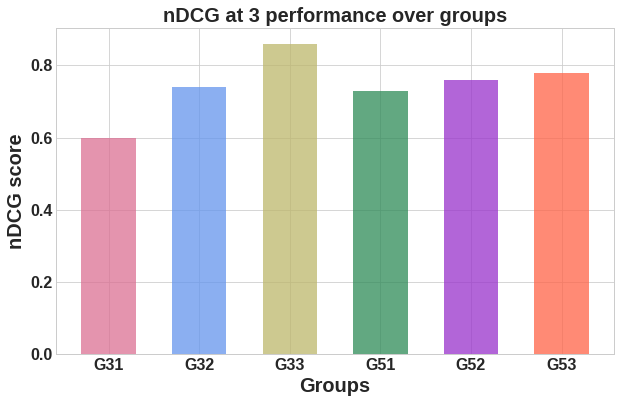

In [18]:
plt.rcParams['figure.figsize'] = (10,6)

groups = ('G31', 'G32', 'G33', 'G51', 'G52', 'G53')
y_pos = np.arange(len(groups))
ndcg_at_3 = groups_ndcg_at_3

plt.bar(groups, ndcg_at_3, width=0.6, align='center', alpha=0.75, color=['palevioletred', 'cornflowerblue', 'darkkhaki', 'seagreen', 'darkorchid', 'tomato'])
plt.xticks(y_pos, groups, fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.xlabel('Groups',fontweight="bold", fontsize=20)
plt.title('nDCG at 3 performance over groups',fontweight="bold", fontsize=20)

plt.savefig('ndcg@3.png', transparent=True)

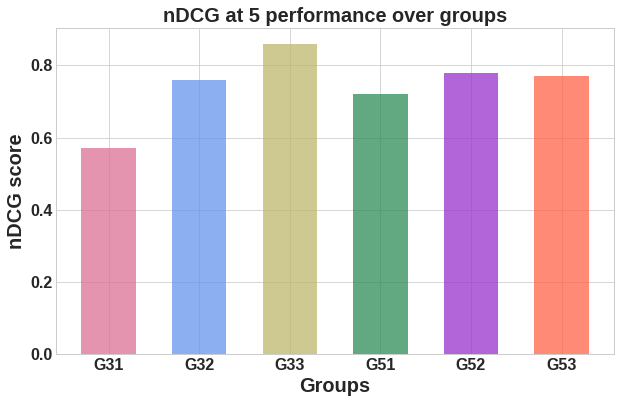

In [19]:
plt.rcParams['figure.figsize'] = (10,6)

groups = ('G31', 'G32', 'G33', 'G51', 'G52', 'G53')
y_pos = np.arange(len(groups))
ndcg_at_5 = groups_ndcg_at_5

plt.bar(groups, ndcg_at_5, width=0.6, align='center', alpha=0.75, color=['palevioletred', 'cornflowerblue', 'darkkhaki', 'seagreen', 'darkorchid', 'tomato'])
plt.xticks(y_pos, groups, fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.xlabel('Groups',fontweight="bold", fontsize=20)
plt.title('nDCG at 5 performance over groups',fontweight="bold", fontsize=20)

plt.savefig('ndcg@5.png', transparent=True)

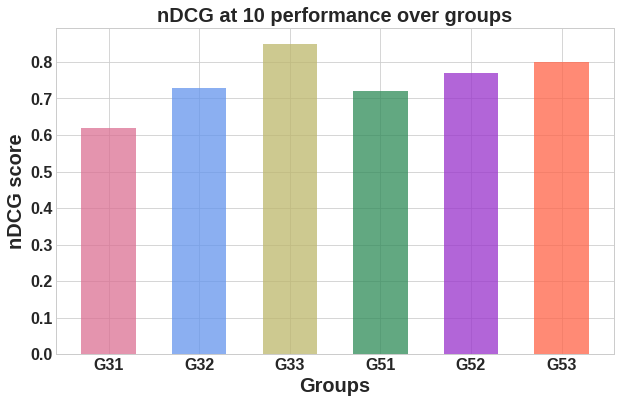

In [20]:
plt.rcParams['figure.figsize'] = (10,6)

groups = ('G31', 'G32', 'G33', 'G51', 'G52', 'G53')
y_pos = np.arange(len(groups))
ndcg_at_10 = groups_ndcg_at_10

plt.bar(groups, ndcg_at_10, width=0.6, align='center', alpha=0.75, color=['palevioletred', 'cornflowerblue', 'darkkhaki', 'seagreen', 'darkorchid', 'tomato'])
plt.xticks(y_pos, groups, fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.xlabel('Groups',fontweight="bold", fontsize=20)
plt.title('nDCG at 10 performance over groups',fontweight="bold", fontsize=20)

plt.savefig('ndcg@10.png', transparent=True)

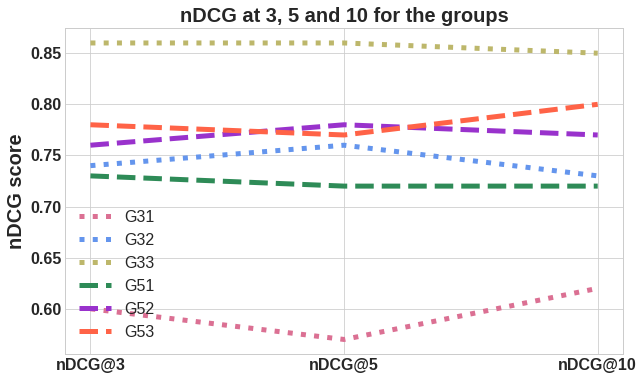

In [21]:
plt.rcParams['figure.figsize'] = (10,6)

ndcg_at = ['nDCG@3','nDCG@5','nDCG@10']

g31 = [groups_ndcg_at_3[0], groups_ndcg_at_5[0], groups_ndcg_at_10[0]]
g32 = [groups_ndcg_at_3[1], groups_ndcg_at_5[1], groups_ndcg_at_10[1]]
g33 = [groups_ndcg_at_3[2], groups_ndcg_at_5[2], groups_ndcg_at_10[2]]
g51 = [groups_ndcg_at_3[3], groups_ndcg_at_5[3], groups_ndcg_at_10[3]]
g52 = [groups_ndcg_at_3[4], groups_ndcg_at_5[4], groups_ndcg_at_10[4]]
g53 = [groups_ndcg_at_3[5], groups_ndcg_at_5[5], groups_ndcg_at_10[5]]

p_g31, = plt.plot(ndcg_at, g31, color='palevioletred', linestyle=':', linewidth=5.0)
p_g32, = plt.plot(ndcg_at, g32, color='cornflowerblue', linestyle=':', linewidth=5.0)
p_g33, = plt.plot(ndcg_at, g33, color='darkkhaki', linestyle=':', linewidth=5.0)
p_g51, = plt.plot(ndcg_at, g51, color='seagreen', linestyle='--', linewidth=5.0)
p_g52, = plt.plot(ndcg_at, g52, color='darkorchid', linestyle='--', linewidth=5.0)
p_g53, = plt.plot(ndcg_at, g53, color='tomato', linestyle='--', linewidth=5.0)

# plt.xlabel('nDCG at',fontweight="bold", fontsize=24)
plt.ylabel('nDCG score',fontweight="bold", fontsize=20)
plt.title('nDCG at 3, 5 and 10 for the groups',fontweight="bold", fontsize=20)
plt.xticks(ndcg_at, ('nDCG@3','nDCG@5','nDCG@10'), fontweight="bold", fontsize=16)
plt.yticks(fontweight="bold", fontsize=16)

plt.legend([p_g31, p_g32, p_g33, p_g51, p_g52, p_g53],['G31','G32','G33','G51','G52','G53'], fontsize=16)

plt.savefig('ndcg@3_5_10.png', transparent=True)
plt.show()

In [34]:
# g31_ndcg = ndcg_score(np.asarray([g31_ground_truth]), np.asarray([g31_scores]),3)
# print(g31_ndcg)

In [35]:
# g32_ndcg = ndcg_score(np.asarray([g32_ground_truth]), np.asarray([g32_scores]),3)
# print(g32_ndcg)

In [36]:
# g33_ndcg = ndcg_score(np.asarray([g33_ground_truth]), np.asarray([g33_scores]),3)
# print(g33_ndcg)

In [37]:
# g51_ndcg = ndcg_score(np.asarray([g51_ground_truth]), np.asarray([g51_scores]),3)
# print(g51_ndcg)

In [38]:
# g52_ndcg = ndcg_score(np.asarray([g52_ground_truth]), np.asarray([g52_scores]),3)
# print(g52_ndcg)

In [39]:
# g53_ndcg = ndcg_score(np.asarray([g53_ground_truth]), np.asarray([g53_scores]),3)
# print(g53_ndcg)